In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#change plt style
plt.style.use('ggplot')

In [3]:
#import data
mapdata = np.loadtxt("../mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../train.csv')
spray = pd.read_csv('../spray.csv')

In [4]:
#change column names to lowercase
traps.columns = traps.columns.str.lower()
spray.columns = spray.columns.str.lower()

In [5]:
#check df
spray.head()

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
#check df
traps.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [7]:
#check for NA values
spray.isna().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

<AxesSubplot:>

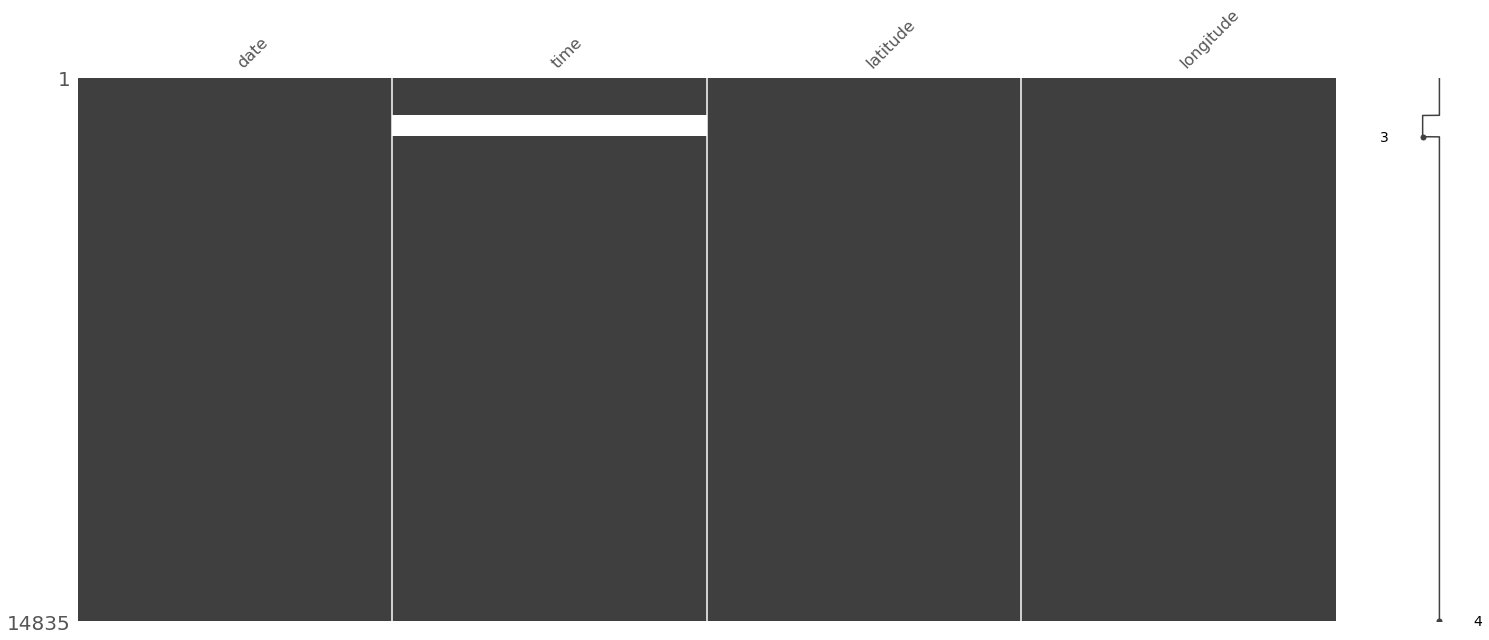

In [8]:
#visualise NA values
msno.matrix(spray)

<AxesSubplot:>

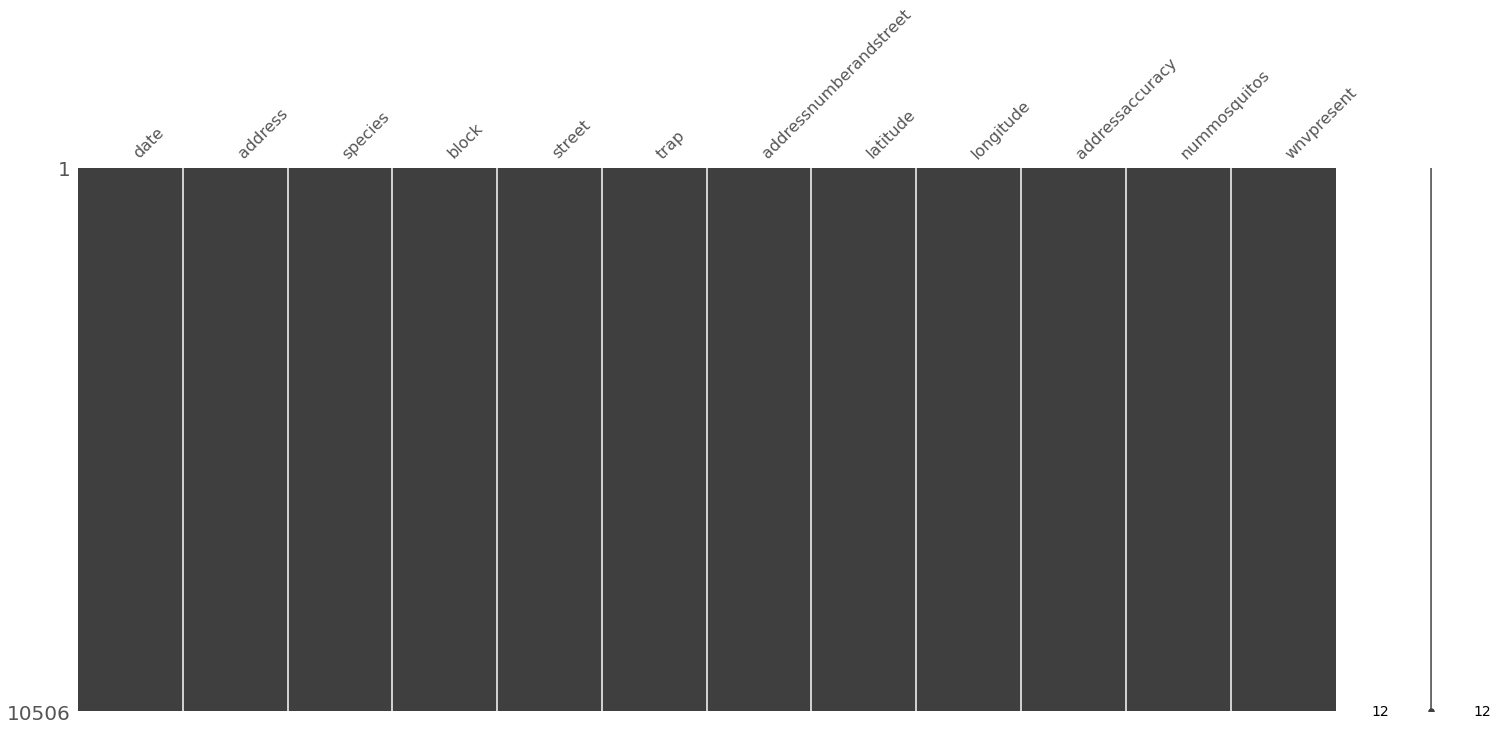

In [9]:
#visualise NA values
msno.matrix(traps)

In [10]:
def plot_map(trap, spray, lon_lat_box, title):
    '''visualise datapoints on chicago city
    
    Parameters:
    trap (dataframe): pandas dataframe 
    spray (dataframe): pandas dataframe 
    lon_lat_box (set): describe the longitude and latitude for the map area
    title (string): tile for the figure

    Returns: chicago city map
    '''
    #set aspect ratio
    aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    
    #plot map data
    fig, ax = plt.subplots(figsize=(10,14))
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    
    #plot spray locations
    s_locations = spray[['longitude', 'latitude']].drop_duplicates().values
    plt.scatter(s_locations[:,0],
                s_locations[:,1],
                marker='o',
                s=5,
                c='tab:red',
                label='spray location',
                alpha=0.08)
    
    #plot trap locations  
    t_locations = trap[['longitude', 'latitude']].drop_duplicates().values
    plt.scatter(t_locations[:,0],
                t_locations[:,1],
                marker='v',
                s=60,
                c='tab:blue',
                label='traps location')
    
    #plot traps locations with wnv  
    wnv_locations = trap[trap['wnvpresent'] == 1][['longitude', 'latitude']].drop_duplicates().values
    plt.scatter(wnv_locations[:,0],
                wnv_locations[:,1],
                marker='v',
                s=30,
                c='tab:orange',
                label='wnv detected')
    
    plt.title(title, fontweight="bold")
    ax.legend()
    plt.show()

In [11]:
#create spray col to track spray count
spray['spray'] = 1

In [12]:
#change to date-time data type 
traps['date'] = pd.to_datetime(traps['date'])

#create week and mth_day col
traps['week'] = traps['date'].dt.isocalendar().week
traps['mth_day'] = traps['date'].dt.strftime("%m-%d")

#create new dataframe based on year
traps_2011 = traps[traps['date'].dt.year == 2011]
traps_2013 = traps[traps['date'].dt.year == 2013]

In [13]:
#change to date-time data type 
spray['date'] = pd.to_datetime(spray['date'])

#create week and mth_day col
spray['week'] = spray['date'].dt.isocalendar().week
spray['mth_day'] = spray['date'].dt.strftime("%m-%d")

#create new dataframe based on year
spray_2011 = spray[spray['date'].dt.year == 2011]
spray_2013 = spray[spray['date'].dt.year == 2013]

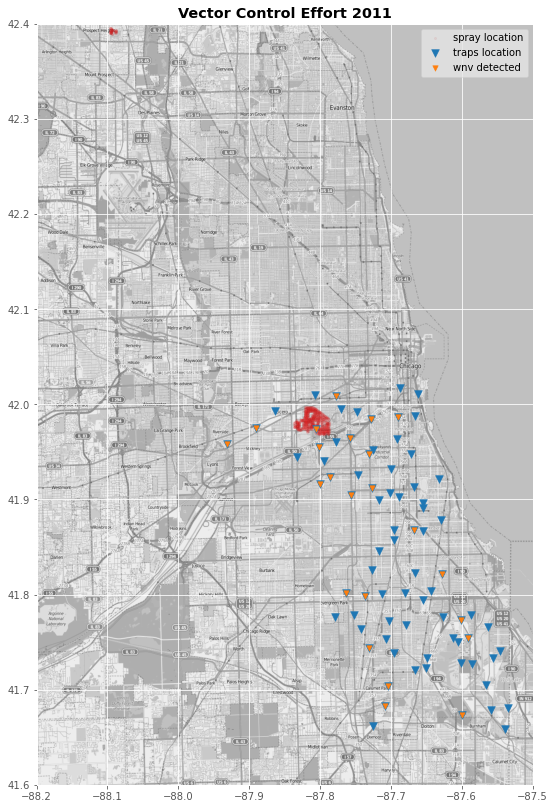

In [14]:
#plot vector control effort in 2011 
plot_map(traps_2011, spray_2011, (-88.2, -87.5, 41.6, 42.4), 'Vector Control Effort 2011')

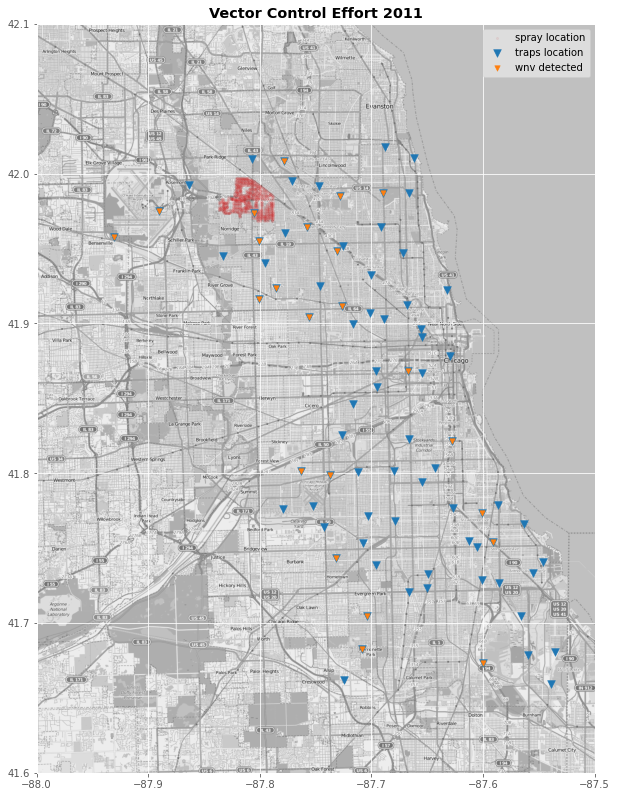

In [15]:
#outliers in spray data in 2011
#masked off latitude >42.2
plot_map(traps_2011, spray_2011[spray_2011['latitude']<42.2], (-88, -87.5, 41.6, 42.1), 'Vector Control Effort 2011')

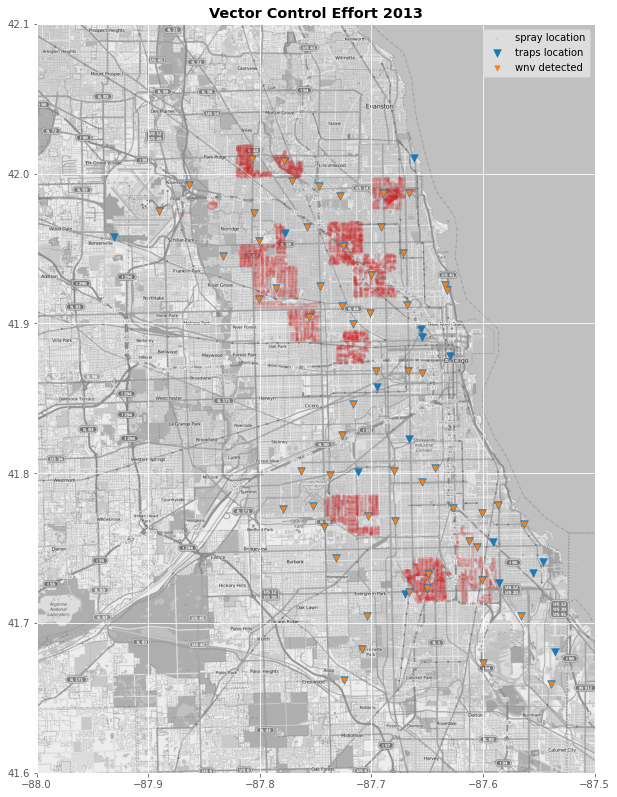

In [16]:
#plot vector control effort in 2013
plot_map(traps_2013, spray_2013, (-88, -87.5, 41.6, 42.1), 'Vector Control Effort 2013')

In [17]:
traps_2011.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,week,mth_day
6060,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX TERRITANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,23,06-10
6061,2011-06-10,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,1,0,23,06-10
6062,2011-06-10,"7500 North Oakley Avenue, Chicago, IL 60645, USA",CULEX RESTUANS,75,N OAKLEY AVE,T148,"7500 N OAKLEY AVE, Chicago, IL",42.017430,-87.687769,8,2,0,23,06-10
6063,2011-06-10,"5800 North Western Avenue, Chicago, IL 60659, USA",CULEX PIPIENS/RESTUANS,58,N WESTERN AVE,T028,"5800 N WESTERN AVE, Chicago, IL",41.986921,-87.689778,9,1,0,23,06-10
6064,2011-06-10,"5000 South Central Avenue, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,50,S CENTRAL AVE,T031,"5000 S CENTRAL AVE, Chicago, IL",41.801498,-87.763416,9,4,0,23,06-10


In [18]:
#define list of mosquitos speices 
mos_species = traps_2011.species.unique().tolist()
mos_species = ['species_'+i for i in mos_species]

In [19]:
#encode species columns 
temp_2011 = pd.get_dummies(traps_2011, columns=['species'])

#re-compute the number of mosquitos based on the species observed 
for i in mos_species:
    temp_2011[i] = temp_2011[i] * temp_2011['nummosquitos']

In [20]:
temp_2011.head()

,date,address,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,week,mth_day,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS
6060,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,23,06-10,0,0,0,0,0,1
6061,2011-06-10,"1700 West 95th Street, Chicago, IL 60643, USA",17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,1,0,23,06-10,0,1,0,0,0,0
6062,2011-06-10,"7500 North Oakley Avenue, Chicago, IL 60645, USA",75,N OAKLEY AVE,T148,"7500 N OAKLEY AVE, Chicago, IL",42.017430,-87.687769,8,2,0,23,06-10,0,0,2,0,0,0
6063,2011-06-10,"5800 North Western Avenue, Chicago, IL 60659, USA",58,N WESTERN AVE,T028,"5800 N WESTERN AVE, Chicago, IL",41.986921,-87.689778,9,1,0,23,06-10,0,1,0,0,0,0
6064,2011-06-10,"5000 South Central Avenue, Chicago, IL 60638, USA",50,S CENTRAL AVE,T031,"5000 S CENTRAL AVE, Chicago, IL",41.801498,-87.763416,9,4,0,23,06-10,0,4,0,0,0,0


In [21]:
#create new df
temp_2011 = temp_2011.groupby('week').sum().drop(columns=['block', 'latitude', 'longitude','addressaccuracy','nummosquitos', 'wnvpresent'])

#reset indext
temp_2011.reset_index(inplace=True)

In [22]:
#check new df
temp_2011.head()

,week,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS
0,23,8,95,311,6,0,9
1,24,5,276,520,27,0,2
2,25,3,303,537,2,0,1
3,26,43,1093,786,1,0,21
4,28,69,2607,1866,9,0,37


Text(0, 0.5, 'num of mosquitoes')

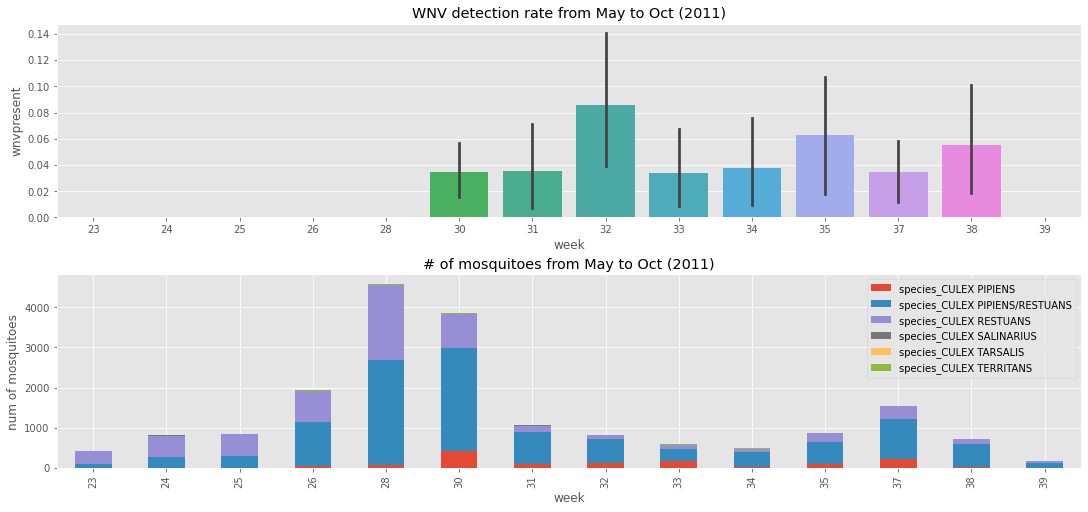

In [23]:
#plot MNV detection rate and num of mosquitoes 
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,7), constrained_layout=True)

sns.barplot(data=traps_2011, x='week', y='wnvpresent', ax=ax[0])
temp_2011.plot(x='week',kind='bar', stacked=True, ax=ax[1])


ax[0].set_title("WNV detection rate from May to Oct (2011)")
ax[1].set_title("# of mosquitoes from May to Oct (2011)")
ax[1].set_ylabel('num of mosquitoes')

In [39]:
#check spray frequncy 
display(spray_2011.groupby('mth_day').sum())
display(spray_2011.groupby('week').sum())

,latitude,longitude,spray,week
mth_day,,,,
08-29,4027.271407,-8368.870185,95,3325
09-07,88752.789255,-185621.730275,2114,76104


,latitude,longitude,spray
week,,,
35,4027.271407,-8368.870185,95
36,88752.789255,-185621.730275,2114


In [24]:
#define list of mosquitos speices 
mos_species = traps_2013.species.unique().tolist()
mos_species = ['species_'+i for i in mos_species]

In [25]:
#encode species columns 
temp_2013 = pd.get_dummies(traps_2013, columns=['species'])

#re-compute the number of mosquitos based on the species observed 
for i in mos_species:
    temp_2013[i] = temp_2013[i] * temp_2013['nummosquitos']

In [26]:
temp_2013.head()

,date,address,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,week,mth_day,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TERRITANS
8114,2013-06-07,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,19,0,23,06-07,0,0,0,19,0,0
8115,2013-06-07,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,23,06-07,0,0,0,2,0,0
8116,2013-06-07,"2200 North Cannon Drive, Chicago, IL 60614, USA",22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,1,0,23,06-07,0,0,0,1,0,0
8117,2013-06-07,"1700 West 95th Street, Chicago, IL 60643, USA",17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,4,0,23,06-07,0,0,0,4,0,0
8118,2013-06-07,"8900 South Carpenter Street, Chicago, IL 60620...",89,S CARPENTER ST,T159,"8900 S CARPENTER ST, Chicago, IL",41.732984,-87.649642,8,4,0,23,06-07,0,0,4,0,0,0


In [27]:
#create new df
temp_2013 = temp_2013.groupby('week').sum().drop(columns=['block', 'latitude', 'longitude','addressaccuracy','nummosquitos', 'wnvpresent'])

#reset indext
temp_2013.reset_index(inplace=True)

In [28]:
#check new df
temp_2013.head()

,week,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TERRITANS
0,23,0,0,123,236,0,1
1,24,0,0,491,1179,0,0
2,25,0,0,396,923,0,0
3,26,0,0,1029,333,0,0
4,28,0,0,2785,3841,0,3


Text(0, 0.5, 'num of mosquitoes')

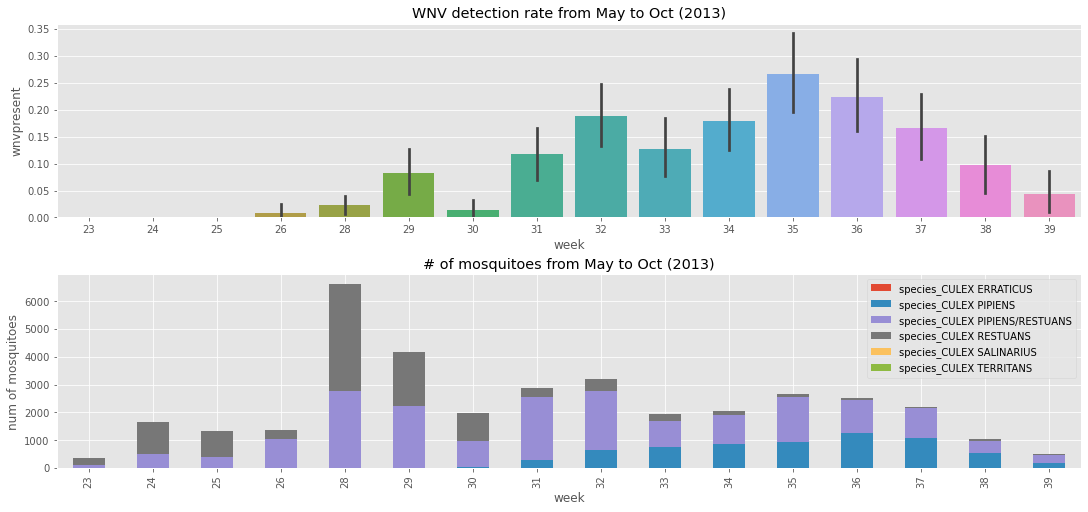

In [30]:
#plot MNV detection rate and num of mosquitoes 
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,7), constrained_layout=True)

sns.barplot(data=traps_2013, x='week', y='wnvpresent', ax=ax[0])
temp_2013.plot(x='week',kind='bar', stacked=True, ax=ax[1])


ax[0].set_title("WNV detection rate from May to Oct (2013)")
ax[1].set_title("# of mosquitoes from May to Oct (2013)")
ax[1].set_ylabel('num of mosquitoes')

In [40]:
#check spray frequncy 
display(spray_2013.groupby('mth_day').sum())
display(spray_2013.groupby('week').sum())

,latitude,longitude,spray,week
mth_day,,,,
07-17,92040.451875,-193073.864637,2202,63858
07-25,67420.937047,-140970.666583,1607,48210
08-08,50108.102205,-104797.957000,1195,38240
08-15,111858.585642,-234205.500608,2668,88044
08-16,5916.051115,-12377.071155,141,4653
08-22,66358.901177,-139125.987308,1587,53958
08-29,96362.014075,-201892.851775,2302,80570
09-05,38813.022412,-81139.290430,924,33264


,latitude,longitude,spray
week,,,
29,92040.451875,-193073.864637,2202
30,67420.937047,-140970.666583,1607
32,50108.102205,-104797.957000,1195
33,117774.636757,-246582.571763,2809
34,66358.901177,-139125.987308,1587
35,96362.014075,-201892.851775,2302
36,38813.022412,-81139.290430,924
